# Real time Object Detection using YOLOv3

In [24]:
# importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Object Detection (image as an input)
## Loading our image

In [25]:
# function for displaying image
def imgShow(image):
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [26]:
image =  cv2.imread('img1.jpeg')
imgShow(image)

In [27]:
# checking image shape 
image.shape

(610, 905, 3)

## Reading class names from coco.names

In [28]:
class_file = 'coco.names'
class_names = []

# Loading names of classes
with open(class_file, 'rt') as file:
    class_names = file.read().rstrip('\n').split('\n')

print(class_names)
print("\n Total classes are : ", len(class_names))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

 Total classes are :  80


In [29]:
# Loading config file
configuration = 'yolov3.cfg'

# Loading weights file
weights = 'yolov3.weights'

# cv2.dnn.readNetFromDarknet() method is used for loading saved weights into the network.
net = cv2.dnn.readNetFromDarknet(configuration, weights)
# This will give us network architecture as specified in configuration loaded with trained weights of yolov3

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

## Let's take a look at all the layers in YOLO architecture

In [30]:
# getLayerNames() : used for getting a structure of all layers in YOLO network 
layers = net.getLayerNames()
print(layers)
print("\nTotal layers : ", len(layers))

['conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [31]:
# Try to locate output layers
output_layer = [layers[i[0]-1] for i in net.getUnconnectedOutLayers()]
print(output_layer)

['yolo_82', 'yolo_94', 'yolo_106']


## Construct a blob from the image

Blob image contains regions of image that differs in properties like brightness, contrast or color.

**blob = cv2.dnn.blobFromImage(image, scalefactor, size, swapRB, crop)**
1. image : Input image we want to preprocess before passing it through our YOLO network.
2. scalefactor : We can optionally scale our images by some factor.
3. size : Here we supply the spatial size that the Convolutional Neural Network expects.
4. swapRB : OpenCV assumes images are in BGR channel order; however, the `mean` value assumes we are using RGB order.
   To resolve this discrepancy we can swap the R and B channels in image  by setting this value to `True`. By default
   OpenCV  performs this channel swapping for us.
5. crop : Indicates whether image will be cropped after resize or not

**Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:**

* 320×320 it’s small so less accuracy but better speed
* 609×609 it’s bigger so high accuracy and slow speed
* 416×416 it’s in the middle and you get a bit of both.

In [32]:
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), swapRB = True, crop = False)

In [33]:
blob

array([[[[0.75656   , 0.7644    , 0.74480003, ..., 0.79184   ,
          0.79184   , 0.79184   ],
         [0.75656   , 0.76832   , 0.74088   , ..., 0.79184   ,
          0.79184   , 0.79184   ],
         [0.7644    , 0.76048   , 0.74088   , ..., 0.79184   ,
          0.79184   , 0.79184   ],
         ...,
         [0.49      , 0.49      , 0.49      , ..., 0.6272    ,
          0.62328   , 0.61936   ],
         [0.49      , 0.49      , 0.49392   , ..., 0.63112   ,
          0.63504   , 0.63112   ],
         [0.49      , 0.49      , 0.49      , ..., 0.63112   ,
          0.63504   , 0.63112   ]],

        [[0.7644    , 0.78008   , 0.79184   , ..., 0.8428    ,
          0.8428    , 0.8428    ],
         [0.7644    , 0.78792   , 0.79184   , ..., 0.8428    ,
          0.8428    , 0.8428    ],
         [0.78008   , 0.78792   , 0.79184   , ..., 0.8428    ,
          0.8428    , 0.8428    ],
         ...,
         [0.47432   , 0.47432   , 0.47432   , ..., 0.588     ,
          0.588     , 0.5

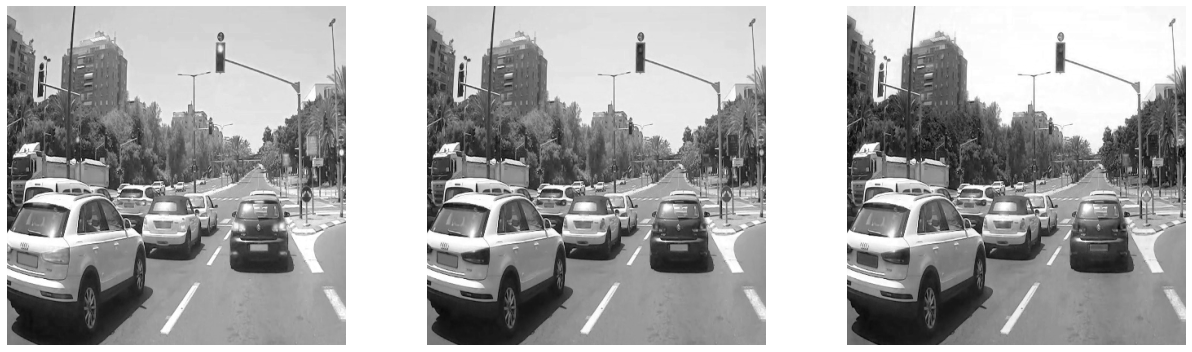

In [34]:
# trying to display bolb images. We can see slight change in every image as these images are of 3 color channels.
axes = []
fig = plt.figure(figsize = (20,5))
rows = 1
cols = 3

for i in range(rows * cols):
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.imshow(blob[0][i], cmap='gray')
    plt.axis('off')
    plt.tight_layout()

## Giving input (blob) to our model

In [35]:
# setting the input as 'blob'
net.setInput(blob)

In [36]:
#  Here is the result of the detection. 

output = net.forward(output_layer)

# At this point the detection is done, and we only need to show the result on the screen.

In [37]:
output

[array([[0.04212094, 0.04552575, 0.51544356, ..., 0.        , 0.        ,
         0.        ],
        [0.0476645 , 0.03240912, 0.33884567, ..., 0.        , 0.        ,
         0.        ],
        [0.05022269, 0.03939571, 0.7875214 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9569431 , 0.9492401 , 0.37338832, ..., 0.        , 0.        ,
         0.        ],
        [0.9617714 , 0.959693  , 0.28523347, ..., 0.        , 0.        ,
         0.        ],
        [0.96549916, 0.9609169 , 0.88070303, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01981558, 0.02363354, 0.04577895, ..., 0.        , 0.        ,
         0.        ],
        [0.01755122, 0.01743549, 0.4464479 , ..., 0.        , 0.        ,
         0.        ],
        [0.02116718, 0.01399645, 0.06850329, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9735598 , 0.9778529 , 0.04957167, ..., 0.        , 0.        ,
         0.        

* 'Output' is an array that conains all the informations about objects detected, their position
and the confidence about the detection.
* At this point the detection is done, and we only need to show the result on the screen.
* We'll loop through the output array, we'll calculate the confidence and we'll choose confidence threshold.

### Alloting different colors for different classes

In [38]:
colors = np.random.uniform(0,255,size=(len(class_names),3))

In [39]:
# getting height, width and color channels of our image.
height,width,channel = image.shape

In [40]:
class_ids = []
confidences = []
boxes = []

for out in output:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        #print(confidence)
        
        if confidence > 0.5:
            # it’s greater than 0.5, we consider the object correctly detected, otherwise we skip it.
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            ## Rectangle coordinates
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

When we perform the detection, it happens that we have more boxes for the same object, so we should use another function to remove this **“noise”**.
It’s called **Non maximum suppresion.**

In [41]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [42]:
#fontScale = (width * height) / (1000 * 1000)

for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(class_names[class_ids[i]])
        color = colors[class_ids[i]]
        
        # Use this for printing co-ordinates of detected objects.
        # print(x,y,w,h)
        
        cv2.rectangle(image, (x,y), (x+w,y+h), color, 2)
        cv2.putText(image, label, (x,y-20), cv2.FONT_HERSHEY_PLAIN, 1, color, 2)
        
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2. Object Detection (Video file as an input)

In [43]:
# Defining a function for object detection.
def object_detection(frame):
    
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), swapRB = True, crop = False)
    
    net.setInput(blob)
    
    output = net.forward(output_layer)
    
    class_ids = []
    confidences = []
    boxes = []
    
    for out in output:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            #print(confidence)
            
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                
                ## Rectangle coordinates
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                
                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
        
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    
    #fontScale = (width * height) / (1000 * 1000)

    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h = boxes[i]
            label = str(class_names[class_ids[i]])
            color = colors[class_ids[i]]
            #print(x,y,w,h)
            
            cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)
            cv2.putText(frame,label,(x,y-20),cv2.FONT_HERSHEY_PLAIN, 1,color, 2)
            
    cv2.imshow('image',frame)


In [44]:
cap = cv2.VideoCapture('video.mp4') 

while(cap.isOpened()):
    _, frame = cap.read() 
    height,width,channel = frame.shape
        
    # calling object_detection() function
    object_detection(frame)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# 3. Object Detection (using Webcam)

In [45]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read() 
    height,width,channel = frame.shape
    
    # calling object_detection() function
    object_detection(frame)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()  